# Introduction to Neural Networks


## Homework 1: ANNs and Model Interpretability

**June 2020**<br>
**Instructor:** Pavlos Protopapas<br>

---

In [2]:
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and are aiming to teach. And, if a problem specifies a particular library, you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [3]:
import random
random.seed(112358)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from random import randint 

from sklearn import tree
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)  # You should see a 2.0.0 here!

2.0.0


<div class="exercise"> <b> Question 1: Construct a feed forward neural network [25 pts]</b> </div>

In this part of the homework, you are to construct three feed-forward neural networks. Each neural network will consist of 2 hidden layers and an output layer. The three different networks only differ in their number of nodes used for their hidden layer, which we specify in each specific question below. All networks' hidden layers use the sigmoid as the activation function, along with a linear output node. 

**You should code the equations from scratch.**

You are given three datasets containing $(x,y)$ points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

 

**1.1** Read the files into variables named `step_df`, `one_hump_df`, and `two_hump_df`.
Perform a forward pass using a network with one hidden layer with **one** node. The input to the network is the $x$ `step_df.x`.  Adjust the weights manually until the predicted outputs matches as closely as possible to the true $y$'s (`step_df.y`) and plot the output from the network; in the same plot, show the true $y$ values. 

**1.2** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

**1.3** Do the same for the **two humps** function data, but this time increase the number of hidden nodes to **four**.  

**1.4** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of **the output layer's weights** for all three cases (step, one hump, and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What are the optimized weight value and loss you obtained? 

__NOTE: Only perform gradient descent for the output layer's weights (the ones that connect the hidden layer to the output layer)__

## Answers

**1.1** Read the files into variables named `step_df`, `one_hump_df`, and `two_hump_df`.
Perform a forward pass using a network with one hidden layer with **one** node. The input to the network is the $x$ `step_df.x`.  Adjust the weights manually until the predicted outputs matches as closely as possible to the true $y$'s (`step_df.y`) and plot the output from the network; in the same plot, show the true $y$ values.


In [5]:
def sigmoid(x: float) -> float :
    """The sigmoid function 
    """
    # your code here 
    y = 1/(1 + np.exp(-x))
    return y

In [340]:
## read data 
# your code here
step_df = pd.read_csv('data/step_df.csv')
step_df = step_df.sort_values(by = 'x')
display(step_df.shape)
display(step_df.head())

one_hump_df = pd.read_csv('data/one_hump_df.csv')
one_hump_df = one_hump_df.sort_values(by = 'x')


#display(one_hump_df.head())

two_hump_df = pd.read_csv('data/two_hump_df.csv')
two_hump_df = two_hump_df.sort_values(by = 'x')
display(two_hump_df.head())


(100, 2)

x         y
68 -4.861848  0.000912
88 -4.802263  0.000518
11 -4.762236 -0.001055
89 -4.329869  0.000687
78 -4.211975 -0.000976

x         y
16 -4.937933 -0.000108
79 -4.718897 -0.000833
77 -4.678919  0.000998
20 -4.648231  0.000284
94 -4.471990  0.000918

In [94]:
# Forward pass
def forward_step(X_in: np.ndarray, WL_0: np.ndarray, 
                 WL_1: np.ndarray, y_out: np.ndarray) -> (float, float) :
    
    """
    This implements forward step:
        z = X_in . WL_0 #Input layer . Weights
        h = sigmoid(z)  #hidden 
        y = h . WL_1    #Output layer 
        (Add intercepts as appropriate)
    
    Args (3 different scenarios 1.1, 1.2 and 1.3): 
        X_in: Input array
              1.1 - Array shape (100,1)
              1.2 - Array shape (100,1)
              1.3 - Array Shape (100,1)
              
        WL_0: Input array [Weights for Layer 0]
              1.1 - Array shape (2,1)
              1.2 - Array shape (2,2)
              1.3 - Array shape (2,4)
              
        WL_1: Input Array [Weights for Layer 1]
              1.1 - Array shape (2,1) 
              1.2 - Array shape (3,1) 
              1.3 - Array shape (5,1)

        y_out: Input Array
              1.1 - Array shape (100,1)
              1.2 - Array shape (100,1)
              1.3 - Array shape (100,1)
              
    Returns:
              1.1 - Output = (100, 1), hidden = (100, 2)
              1.2 - Output = (100, 1), hidden = (100, 3)
              1.3 - Output = (100, 1), hidden = (100, 5)
              (hidden will be utilized for 1.4)    
    """
 
    # your code here 
    ones = np.ones([len(X_in),1])
    X_in = X_in.reshape(-1,1)
    X = np.append(ones, X_in, axis = 1) #Array shape (100,2)
    z = np.dot(X, WL_0) #Input layer . Weights      Array shape (100,1)/(100,2)/(100,4)
    h = sigmoid(z) #hidden      Array shape (100,1)/(100,2)/(100,4)
    hidden = np.append(ones, h, axis = 1) #Array shape (100,2)/(100,3)/(100,5)
    output = np.dot(hidden, WL_1)     #Output layer Array shape (100,1)
    # end of your code here
    
    return output, hidden

In [1596]:
# ONE STEP - one node in hidden layer 
# your code here
x = step_df.x.values
y = step_df.y.values
WL_0 = [[-40],[20]]   #first
WL_1 = [[0],[1]]
output, hidden = forward_step(x,WL_0,WL_1,y)

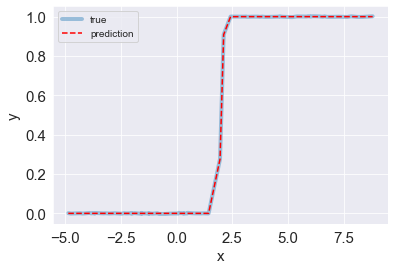

In [1597]:
# plot the prediction vs true
# your code here
font={'size': 15}
plt.tick_params(labelsize=15)
plt.plot(x,y,alpha=0.4, lw=4,label = 'true')
#plt.plot(x,hidden,'.')
plt.plot(x,output,ls='--', c='r', label = 'prediction')
plt.xlabel('x',font)
plt.ylabel('y',font)

plt.legend();

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [137]:
### 1.1 Check that you have the requested variables
for var in ['sigmoid', 'forward_step', 'step_df' , 'one_hump_df' , 'two_hump_df']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**1.2** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.


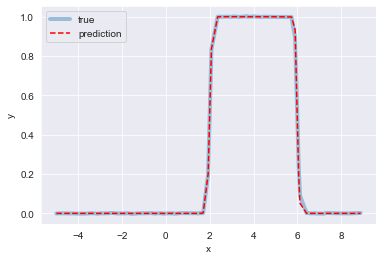

In [939]:
# ONE HUMP  - two nodes in hidden layer
# your code here
x = one_hump_df.x.values
y = one_hump_df.y.values
WL_0 = [[-40,150],[20,-25]]   #first
WL_1 = [[-1],[1],[1]]
output, hidden = forward_step(x,WL_0,WL_1,y)
plt.plot(x,y,alpha=0.4, lw=4,label = 'true')
#plt.plot(x,hidden,'.')
plt.plot(x,output,ls='--', c='r', label = 'prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

**1.3** Do the same for the **two humps** function data, but this time increase the number of hidden nodes to **four**.


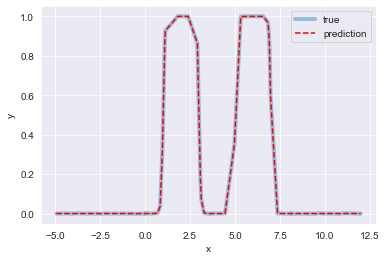

In [1293]:
# TWO HUMPS  - four nodes in hidden layer 
# your code here
x = two_hump_df.x.values
y = two_hump_df.y.values
WL_0 = [[-100,140,-20,60],[20,-20,20,-20]]   #first
WL_1 = [[-2],[1],[1],[1],[1]]
output, hidden = forward_step(x,WL_0,WL_1,y)
plt.plot(x,y,alpha=0.4, lw=4,label = 'true')
#plt.plot(x,hidden,'.')
plt.plot(x,output,ls='--', c='r', label = 'prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

**1.4** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of **the output layer's weights** for all three cases (step, one hump, and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What are the optimized weight value and loss you obtained?

__NOTE: Only perform gradient descent for the output layer's weights (the ones that connect the hidden layer to the output layer)__

In [892]:
# Loss function 
def L(y_pred, y):   
    """
    This function returns the appropriate loss given the predictions and actual values
    Inputs: 
        y_pred: A vector with the predicted y values 
        y:      A vector with the true y values 
    Output:
        loss:   A scalar for the loss"""

    # your code here 
    y_pred = y_pred.reshape(-1)
    mse = sum((y - y_pred) ** 2) / len(y)
    return mse

In [893]:
# derivative with respect to W1
def der_L_WL1(z, y_pred, y):
    """
    This function calculates the derivatives with respect to output weights
    Inputs: 
        y_pred: A vector with the predicted y values 
        y:      A vector with the true y values 
        z:      A vector with the values of the output layer 
    Output:
        ders:   A vector of partial derivatives 
    """
    # your code here 
    y = y.reshape(-1,1)
    
    temp = -2*(y - y_pred)/len(y)
    #print('y_pred.shape',y_pred.shape)
    ders = np.dot(temp.T,z)
    #print('ders type',type(ders))
    #print('ders.shape',ders.shape)
    # end of your code here
    return ders # returns vector of partial derivatives

In [894]:
# gradient descent 
def gradient_descent(num_steps, lr, WL0, WL1, X, y):
    """
    This function performs Gradient Descent
    Inputs: 
        num_steps: Number of steps
        lr: Learning Rate
        WL0: Layer 0 weights
        WL1: Layer 1 weights - Initital value
        X: X
        y: y
     Outputs:
        z1:  A vector with the final values of y (after steps steps)
        WL1_n: The final values of WL1 (after steps steps)
        errors: list of errors
    """
    # your code here 
    errors=[]
    while num_steps > 0:
        num_steps = num_steps - 1
        output, hidden = forward_step(X, WL0 ,WL1 , y)
        errors.append(L(output, y))
        ders = der_L_WL1(hidden, output, y)
        WL1 = WL1 - lr * ders.T
    # end of your code here
    z1 = output
    return z1, WL1, errors

#### a) step function NN (a hidden layer with a single node)

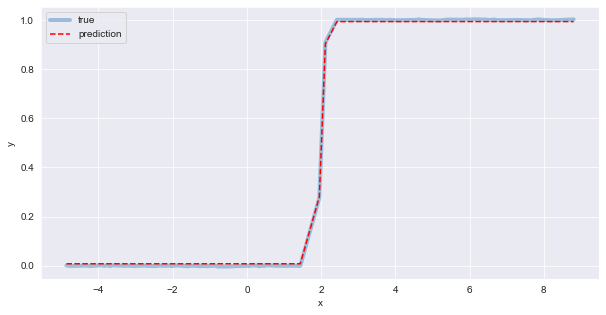

In [1587]:
# SINGLE STEP
# your code here 
X = step_df.x.values
y = step_df.y.values
WL0 = [[-40],[20]]   #first
WL1 = [[0],[0]]
z,w,e = gradient_descent(1000, 0.01, WL0, WL1, X, y)
plt.figure(figsize=(10,5))
plt.plot(X,y,alpha=0.4, lw=4,label = 'true')
plt.plot(X,z,ls='--', c='r', label = 'prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

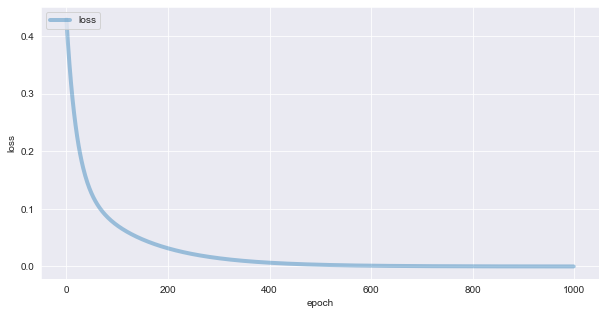

In [1327]:
plt.figure(figsize=(10,5))
plt.plot(e,alpha=0.4, lw=4,label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper left');

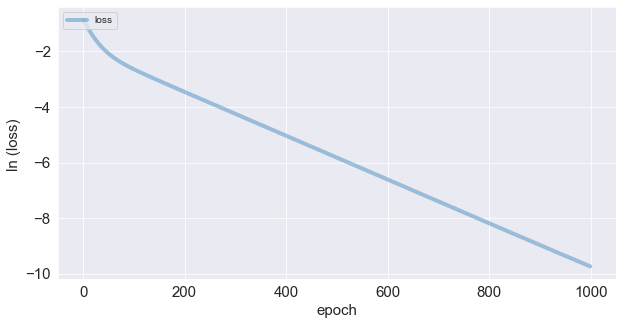

In [1328]:
plt.figure(figsize=(10,5))
plt.tick_params(labelsize=15)
plt.plot(np.log(e),alpha=0.4, lw=4,label = 'loss')
plt.xlabel('epoch',font)
plt.ylabel('ln (loss) ',font)
plt.legend(loc='upper left');

#### b) one hump function NN (a hidden layer with two nodes)

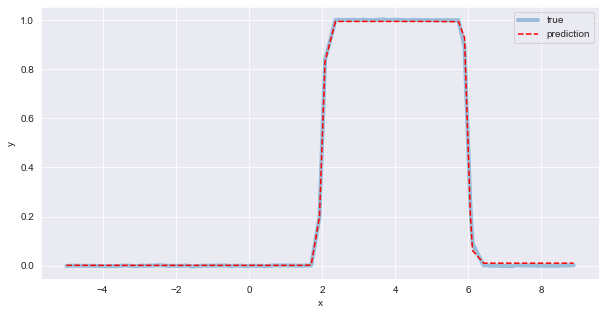

In [1323]:

# ONE HUMP
# your code here 
X = one_hump_df.x.values
y = one_hump_df.y.values
WL0 = [[-40,150],[20,-25]]   #first
WL1 = [[0],[0],[0]]
z,w,e = gradient_descent(5000, 0.01, WL0, WL1, X, y)
plt.figure(figsize=(10,5))
plt.plot(X,y,alpha=0.4, lw=4,label = 'true')
plt.plot(X,z,ls='--', c='r', label = 'prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

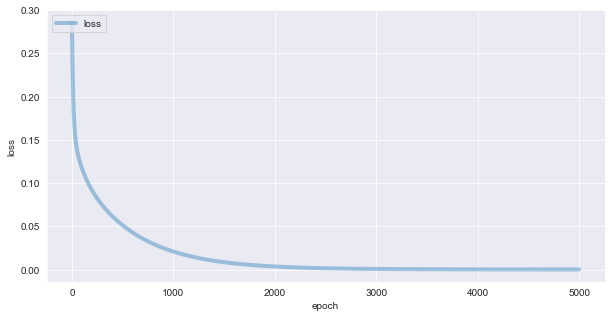

In [1324]:
plt.figure(figsize=(10,5))
plt.plot(e,alpha=0.4, lw=4,label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper left');

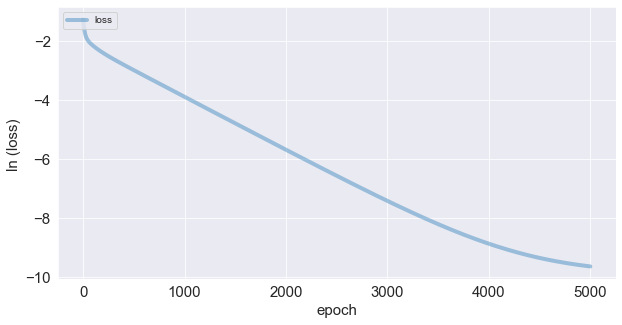

In [1325]:
plt.figure(figsize=(10,5))
plt.tick_params(labelsize=15)
plt.plot(np.log(e),alpha=0.4, lw=4,label = 'loss')
plt.xlabel('epoch',font)
plt.ylabel('ln (loss) ',font)
plt.legend(loc='upper left');

#### c) two hump function NN (a hidden layer with 4 nodes)

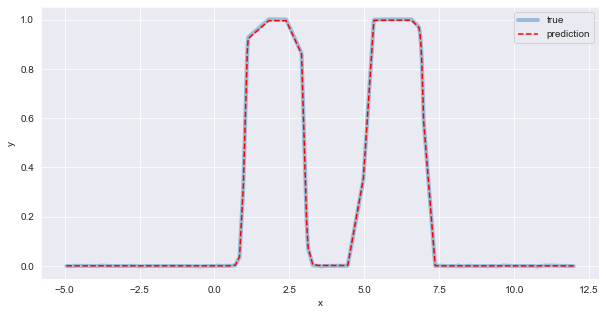

In [1320]:
# TWO HUMPS
# your code here 
X = two_hump_df.x.values
y = two_hump_df.y.values
WL0 = [[-100,140,-20,60],[20,-20,20,-20]]   #first
WL1 = [[0],[0],[0],[0],[0]]
z,w,e = gradient_descent(20000, 0.01, WL0, WL1, X, y)
plt.figure(figsize=(10,5))
plt.plot(X,y,alpha=0.4, lw=4,label = 'true')
plt.plot(X,z,ls='--', c='r', label = 'prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

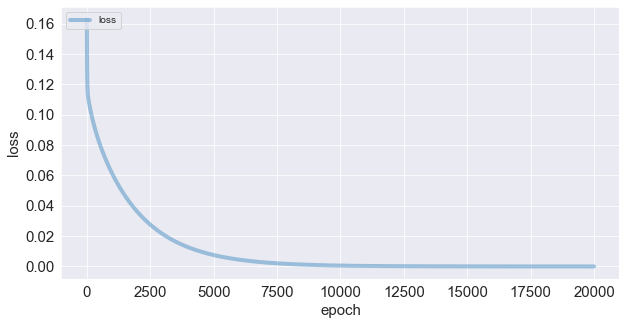

In [1321]:
plt.figure(figsize=(10,5))
plt.tick_params(labelsize=15)
plt.plot(e,alpha=0.4, lw=4,label = 'loss')
plt.xlabel('epoch',font)
plt.ylabel('loss',font)
plt.legend(loc='upper left');

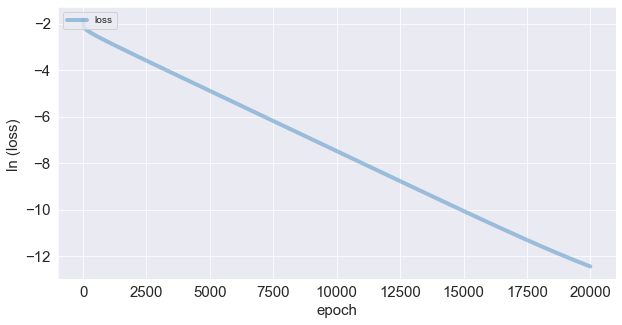

In [1322]:
plt.figure(figsize=(10,5))
plt.tick_params(labelsize=15)
plt.plot(np.log(e),alpha=0.4, lw=4,label = 'loss')
plt.xlabel('epoch',font)
plt.ylabel('ln (loss) ',font)
plt.legend(loc='upper left');


<hr style='height:2pt'>
<div class='theme'> Neural Networks part B</div> 

Neural networks are, of course, a large and complex topic that cannot be covered in a single homework. Here, we'll focus on the key idea of ANNs: they are able to learn a mapping from example input data $X$ (of fixed size) to example output data $Y$ (of fixed size). This is the same concept as every other classification and regression task we've learned so far in the semester. We'll also partially explore what patterns the neural network learns and how well neural networks generalize.

In this question, we'll see if neural networks can learn a limited version of the [Fourier Transform.](https://en.wikipedia.org/wiki/Fourier_transform) (The Fourier Transform takes in values from some function and returns a set of sine and cosine functions which, when added together, approximate the original function.)

In symbols: $ \cal{F(s)} = \int_{-\infty}^\infty f(x)e^{- i xs}dx$. In words, the value of the transformed function at some point, $s$, is the value of an integral which measures, in some sense, how much the original $f(x)$ looks like a wave with a period of $s$. As an example, with $f(x) = 4cos(x) + sin(2x)$,  $\cal{F}(s)$ is 0 everywhere except at -2, -1, 1, and 2, mapping to the waves of period 1 and 1/2. The values at these points are linked to the magnitude of the waves, and their phases (roughly: sin waves versus cosine waves).

The only thing about the Fourier transform that matters for this p-set is this: a function goes in, and a re-written form in terms of sine and cosine comes out.

In our specific problem, we'll train a network to map from 1000 sample values from a function (equally spaced along 0 to 10$\pi$) to the four features of the sine and cosine waves that make up that function. Thus, the network is attempting to learn a mapping from a 1000-entry vector down to a 4-entry vector. Our `X_train` dataset's shape is $N x 1000$ and our `y_train` is $N x 4.$

Questions 2.1 and 2.2 will get you used to the format of the data. 

We'll use 6 data files in this question:
- `sinewaves_X_train.npy` and `sinewaves_y_train.npy`: a (10,000 x 1,000) and (10,000 x 4) training dataset. Examples were generated by randomly selecting a,b,c,d in the interval [0,1] and building the curve $a\sin(b\,x) + c\cos(d\,x)$
- `sinewaves_X_test.npy` and `sinewaves_y_test.npy`: a (2,000 x 1,000) and (2,000 x 4) test dataset, generated in the same way as the training data
- `sinewaves_X_extended_test` and `sinewaves_y_extended_test`: a (9 x 1,000) and (9 x 4) test dataset, testing whether the network can generalize beyond the training data (e.g. to negative values of $a$)

**These datasets are read in to their respective variables for you.**

<div class='exercise'> <b> Question 2 [25pts] </b> </div>
    
**2.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve.

**2.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.024\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.

**2.3** Use `tf.keras` to build a fully-connected neural network:

**a:** Use `tf.keras.models.Sequential` and `tf.keras.layers.Dense` to build the fully-connected neural network. You can choose any number of layers and any number of nodes in each layer. 

**b:** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**c:** Fit your model to the data for $50$ epochs using a batch size of $32$ and a validation split of $0.2$. You can train for longer if you wish -- the fit tends to improve over time.

**2.4** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?

**2.5** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?

**2.6** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- The Tensorflow 2.0 [`tf.keras` (here)](https://www.tensorflow.org/guide/keras) documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

In [1023]:
def plot_predictions(model, test_x, test_y, count=None):
    # Model - a tf.keras model that takes in (n,1000) training data and predicts (n,4) output data
    # test_x - a (n,1000) input dataset
    # test_y - a (n,4) output dataset
    # This function will plot the sine curves in the training data and those implied by the model's predictions.
    # It will also print the predicted and actual output values.
    
    #helper function that takes the n by 4 output and reverse-engineers 
    #the sine curves that output would create
    def y2x(y_data):
        #extract parameters
        a=y_data[:,0].reshape(-1,1)
        b=y_data[:,1].reshape(-1,1)
        c=y_data[:,2].reshape(-1,1)
        d=y_data[:,3].reshape(-1,1)

        #build the matching training data
        x_points = np.linspace(0,10*np.pi,1000)
        x_data = a*np.sin(np.outer(b,x_points)) + c*np.cos(np.outer(d,x_points))
        return x_data
    
    #if <20 examples, plot all. If more, just plot 5
    if count==None:
        if test_x.shape[0]>20:
            count=5
        else:
            count=test_x.shape[0]
    
    #build predictions
    predicted = model.predict(test_x)
    implied_x = y2x(predicted)
    for i in range(count):
        plt.plot(test_x[i,:],label='true')
        plt.plot(implied_x[i,:],label='predicted')
        plt.legend()
        plt.ylim(-2.1,2.1)
        plt.xlabel("x value")
        plt.xlabel("y value")
        plt.title("Curves using the Neural Network's Approximate Fourier Transform")
        plt.show()
        print("true:", test_y[i,:])
        print("predicted:", predicted[i,:])
    
    

In [1024]:
X_train = np.load('data/sinewaves_X_train.npy')
y_train = np.load('data/sinewaves_y_train.npy')

X_test = np.load('data/sinewaves_X_test.npy')
y_test = np.load('data/sinewaves_y_test.npy')

X_extended_test = np.load('data/sinewaves_X_extended_test.npy')
y_extended_test = np.load('data/sinewaves_y_extended_test.npy')

## Answers:  

**2.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve.


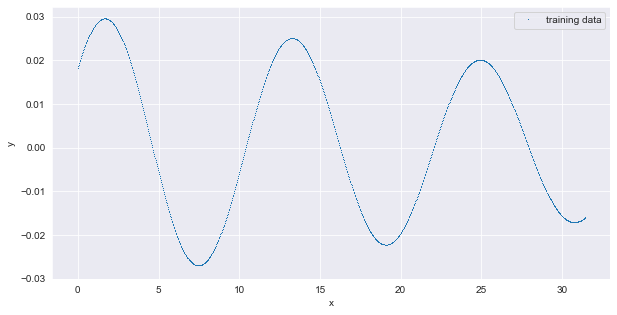

In [996]:
# your code here
plt.figure(figsize=(10,5))
y = X_train[0]
x = np.linspace(0,10*np.pi,1000)
plt.plot(x, y, ',', label = 'training data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

**2.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.024\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.


In [1045]:
# your code here 
def y2x(y_data):
        #extract parameters
        a=y_data[:,0].reshape(-1,1)
        b=y_data[:,1].reshape(-1,1)
        c=y_data[:,2].reshape(-1,1)
        d=y_data[:,3].reshape(-1,1)

        #build the matching training data
        x_points = np.linspace(0,10*np.pi,1000)
        x_data = a*np.sin(np.outer(b,x_points)) + c*np.cos(np.outer(d,x_points))
        return x_data

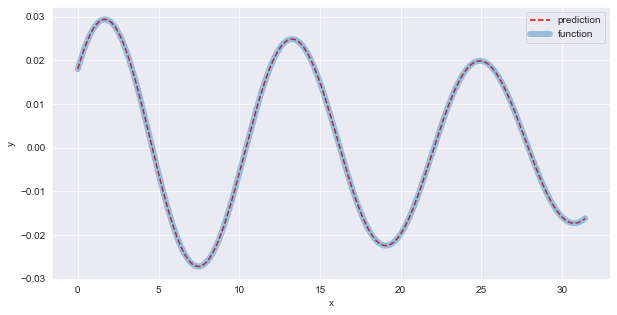

In [1056]:
# your code here
plt.figure(figsize=(10,5))
y = X_train[0]
x = np.linspace(0,10*np.pi,1000)
fy_train = y2x(y_train)
plt.plot(x, y, ls='--', c='r', label = 'prediction')
plt.plot(x, fy_train[0], alpha=0.4, lw=6,label = 'function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

**2.3** Use `tf.keras` to build a fully-connected neural network:

**a:** Use `tf.keras.models.Sequential` and `tf.keras.layers.Dense` to build the fully-connected neural network. You can choose any number of layers and any number of nodes in each layer.

**b:** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**c:** Fit your model to the data for $50$ epochs using a batch size of $32$ and a validation split of $0.2$. You can train for longer if you wish -- the fit tends to improve over time.


In [1071]:
# build the fully-connected neural network
# your code here
model = tf.keras.models.Sequential(name = 'fnn')
model.add(tf.keras.layers.Dense(128, activation = 'relu',input_shape=(1000,), name='h1'))
model.add(tf.keras.layers.Dense(64, activation = 'relu', name='h2'))
model.add(tf.keras.layers.Dense(32, activation = 'relu', name='h3'))
model.add(tf.keras.layers.Dense(16, activation = 'relu', name='h4'))
model.add(tf.keras.layers.Dense(4, activation='linear', name='output'))


In [1072]:
# Compile your model 
# your code here
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()

Model: "fnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 128)               128128    
_________________________________________________________________
h2 (Dense)                   (None, 64)                8256      
_________________________________________________________________
h3 (Dense)                   (None, 32)                2080      
_________________________________________________________________
h4 (Dense)                   (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 4)                 68        
Total params: 139,060
Trainable params: 139,060
Non-trainable params: 0
_________________________________________________________________


*your answer here*

---


In [1073]:
# Fit your model 
# your code here
history = model.fit(X_train,y_train,epochs=100, validation_split=0.2, batch_size=32)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 239us/sample - loss: 0.1606 - val_loss: 0.1100
Epoch 2/100
8000/8000 [==============================] - 1s 144us/sample - loss: 0.0910 - val_loss: 0.0791
Epoch 3/100
8000/8000 [==============================] - 1s 147us/sample - loss: 0.0752 - val_loss: 0.0729
Epoch 4/100
8000/8000 [==============================] - 1s 153us/sample - loss: 0.0665 - val_loss: 0.0667
Epoch 5/100
8000/8000 [==============================] - 1s 151us/sample - loss: 0.0609 - val_loss: 0.0592
Epoch 6/100
8000/8000 [==============================] - 1s 153us/sample - loss: 0.0571 - val_loss: 0.0548
Epoch 7/100
8000/8000 [==============================] - 1s 154us/sample - loss: 0.0534 - val_loss: 0.0574
Epoch 8/100
8000/8000 [==============================] - 1s 155us/sample - loss: 0.0502 - val_loss: 0.0528
Epoch 9/100
8000/8000 [==============================] - 1s 156us/sample - loss: 0.0480 - val_lo

8000/8000 [==============================] - 1s 163us/sample - loss: 0.0235 - val_loss: 0.0250
Epoch 77/100
8000/8000 [==============================] - 1s 166us/sample - loss: 0.0228 - val_loss: 0.0241
Epoch 78/100
8000/8000 [==============================] - 1s 167us/sample - loss: 0.0226 - val_loss: 0.0252
Epoch 79/100
8000/8000 [==============================] - 1s 170us/sample - loss: 0.0227 - val_loss: 0.0246
Epoch 80/100
8000/8000 [==============================] - 1s 163us/sample - loss: 0.0224 - val_loss: 0.0254
Epoch 81/100
8000/8000 [==============================] - 1s 164us/sample - loss: 0.0227 - val_loss: 0.0218
Epoch 82/100
8000/8000 [==============================] - 1s 163us/sample - loss: 0.0225 - val_loss: 0.0271
Epoch 83/100
8000/8000 [==============================] - 1s 163us/sample - loss: 0.0231 - val_loss: 0.0236
Epoch 84/100
8000/8000 [==============================] - 1s 163us/sample - loss: 0.0219 - val_loss: 0.0226
Epoch 85/100
8000/8000 [=================

**2.4** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?


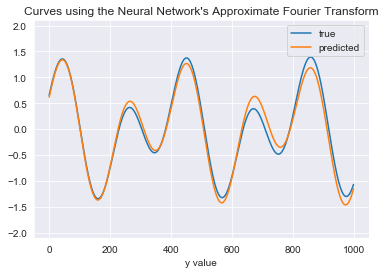

true: [0.86199664 0.98175913 0.65523998 0.4870337 ]
predicted: [0.8860471 0.9791868 0.6161445 0.5027215]


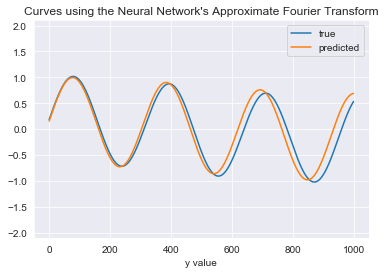

true: [0.8406355  0.63159555 0.18328701 0.11174618]
predicted: [0.8447815  0.6484783  0.154852   0.09917855]


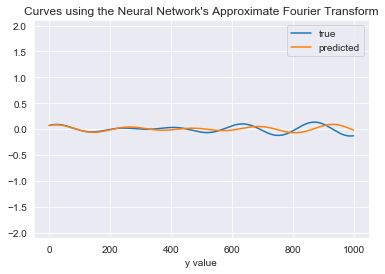

true: [0.06591224 0.75183886 0.06986143 0.91352303]
predicted: [0.05215094 0.7288352  0.06839216 0.8398691 ]


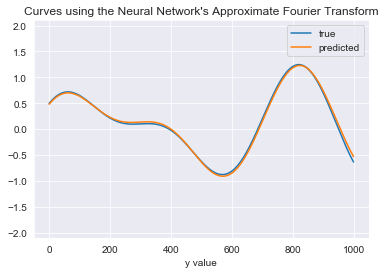

true: [0.75610725 0.30861152 0.49522059 0.48394499]
predicted: [0.74903214 0.30433524 0.48043576 0.48519254]


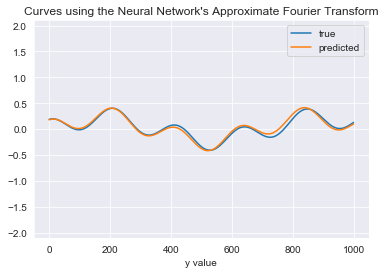

true: [0.2229353  0.27885697 0.18696198 0.94846283]
predicted: [0.23814607 0.29172125 0.17912164 0.95642966]


In [1074]:
# your code here
plot_predictions(model, X_test, y_test, count=None)

mae_test =  0.02302353170711326


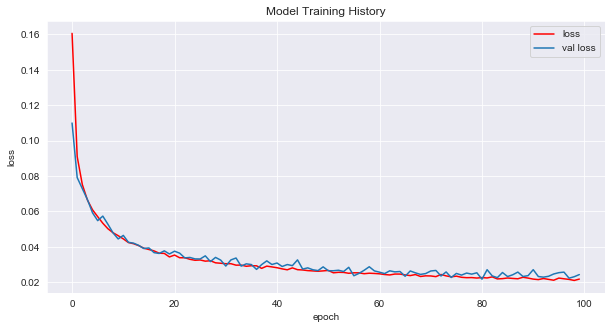

In [1113]:
# model's overall loss
# your code here
from sklearn.metrics import mean_absolute_error 
predict = model.predict(X_test)
mae_test = mean_absolute_error(y_test,predict)
print('mae_test = ', mae_test)
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], c='r', label='loss')
plt.plot(history.history['val_loss'], label='val loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Model Training History');
plt.legend()


*your answer here*

From the first five pictures shown above, all of them fit well except the first one
----

**2.5** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?


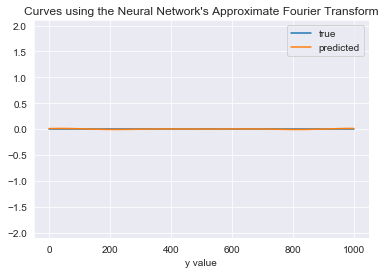

true: [0. 0. 0. 0.]
predicted: [0.00885936 0.48437583 0.00981858 0.58332646]


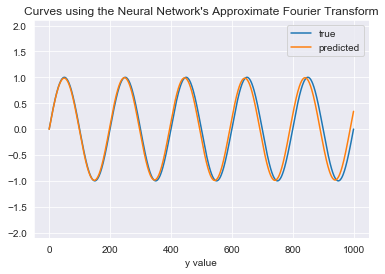

true: [1. 1. 0. 0.]
predicted: [ 0.9885334   1.0111415  -0.0050943   0.32211798]


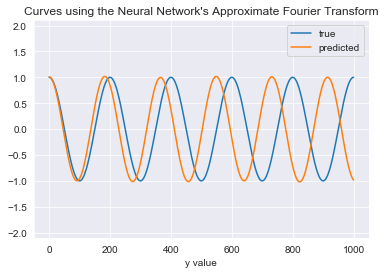

true: [0. 0. 1. 1.]
predicted: [0.01106507 0.40819198 1.0090786  1.0932834 ]


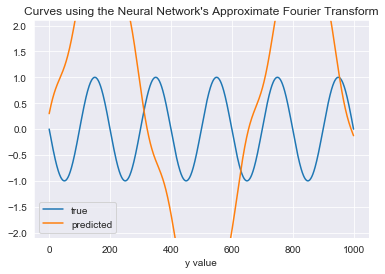

true: [-1.  1.  0.  0.]
predicted: [3.136782   0.30112046 0.29765508 1.5482395 ]


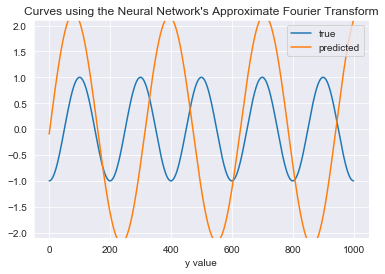

true: [ 0.  0. -1.  1.]
predicted: [ 2.2662942   0.63552755 -0.09544537  0.5265528 ]


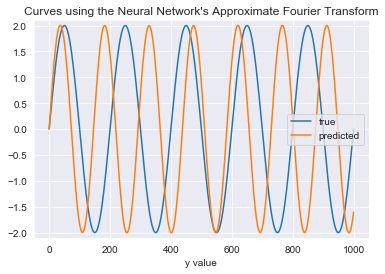

true: [2. 1. 0. 0.]
predicted: [1.9998748  1.3704518  0.00384375 0.2863034 ]


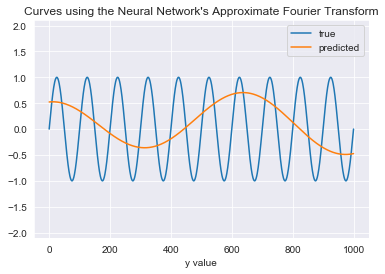

true: [1. 2. 0. 0.]
predicted: [0.19667503 0.09779792 0.52346385 0.3119262 ]


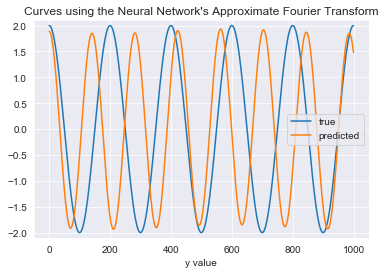

true: [0. 0. 2. 1.]
predicted: [-0.04321753  0.25450945  1.8901403   1.4202771 ]


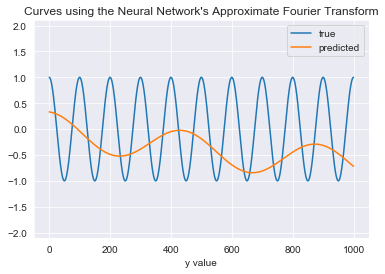

true: [0. 0. 1. 2.]
predicted: [ 0.7214627  -0.03774126  0.33146444  0.45498097]


In [1118]:
# your code here
plot_predictions(model, X_extended_test, y_extended_test, count=None)

*Your answer here*
The first two results were good, the subsequent results were bad
----

**2.6** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- The Tensorflow 2.0 [`tf.keras` (here)](https://www.tensorflow.org/guide/keras) documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

*Your answer here*
The shorter the period is, the worse the result is. Maybe the phenomenon is related to DFT (And this has to do with the transformation of the time domain and the frequency domain) .
----


<hr style='height:2pt'>

<div class='theme'> Regularizing Neural Networks </div>

In this problem set, we have already explored how ANNs are able to learn a mapping from example input data (of fixed size) to example output data (of fixed size), and how well the neural network can generalize. In this problem, we focus on issues of overfitting and regularization in neural networks.

As we have explained in class, ANNs can be prone to overfitting, where they learn specific patterns present in the training data, but the patterns do not generalize to new data.

There are several methods used to improve ANN generalization. One approach is to use an architecture just barely wide or deep enough to fit the data. The idea here is that smaller networks are less expressive and thus less able to overfit the data.

However, it is difficult to know a priori the correct size of the ANN, and it is computationally costly to hunt for the correct size. Given this, other methodologies are used to prevent overfitting and improve ANNs' generalizability. These methodologies, like other techniques that combat overfitting, fall under the umbrella of regularization.

In this problem, you are asked to regularize a network given to you below.
    
For this problem, we will be working with a modified version of MNIST dataset (MNIST CS109, MNIST: Modified National Institute of Standards and Technology database), which is a large database of handwritten digits and commonly used for training various image processing systems. This dataset consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images. For pedagogical simplicity, we will only use the digits labeled `4` and `9`, and we want to use a total of 1600 samples for training (this includes the data you will use for validation).

We have selected the samples for you and the dataset is available at https://www.kaggle.com/c/intro-to-nns-hw1-june-2020/data. You have to create an account on Kaggle and join the competition via https://www.kaggle.com/t/ec2eba573312496d8f53a8ec8f18695d. This is a limited participation competition. Please do not share link. Note, it's not technically a competition, as your goal is merely to create an appropriate, strong model that performs well. We will evaluate your skills based on this, not in terms of how you compare to your classmates.

`x_train_mnist_cs109.csv` is our training dataset, last column is the target column. Class 0 means sample is handwritten digit 4 and class 1 means sample is handwritten digit 9.  784 columns correspond to 28x28 image size. 


`x_test_mnist_cs109.csv` has  structure similar to `x_train_mnist_cs109.csv` with no labels. `x_test_mnist_cs109.csv` has 3200  samples. Kaggle leaderboard scores are accuracy scores calculated on this test set.  

`sample_submission.csv` is the format that kaggle will accept.



<div class='exercise'> <b> Question 3 [25 pts] </b> </div>
    
**3.1**  Download data from the competition page. You should have three files `x_train_mnist_cs109.csv`, `x_test_mnist_cs109.csv` and `sample_submission.csv`. We will utilize `x_test_mnist_cs109.csv` in 3.3.  Load the data and use the matplotlib function `imshow` to display a handwritten 4 and a handwritten 9.

**3.2** **Overfit an ANN:** Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to a variable called `model_overfit`: 

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100, 100, 100
2. Activation function: ReLU 
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid 
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: no more than 2,000
7. Batch size: 128
8. Validation size: .3

This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the # of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting. 

<span style='color:red'>**Important:**</span> You must also print out the final train & validation accuracy score of your overfit model. These are needed for evaluating Q3.3

**3.3** Create an ANN that doesn't overfit and compete on Kaggle.

Keep the architecture above as is. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You can also do data augmentation. 


- 3.3.1 Display model summary, training and validation accuracy and loss. 
<span style='color:red'>**Important:**</span> You _must_ print out the final train accuracy score of your good model. This is needed for evaluating Q3.3
- 3.3.2 Print the difference between training and validation accuracy and loss.
- 3.3.3 Plot the training accuracy and validation accuracy as a function of epochs.
- 3.3.4 Save the model using `model.save(filename)` and **submit it on canvas along with your notebook**. Code on how to save your model is provided below.
- 3.3.5 **Submit your Kaggle name that you have used on the leaderboard. *We can't give you credit without this* . Fill the cell below that starts with ###
(Group 4) ###.** 




**RULES:**

- **Please do not manually label your submissions.** In other words the labels should be the outcome of your model. 

- **No CNNs allowed for this competition.**

- **No external data are allowed, please only use the x_train_mnist_cs109.csv for training the models.**

- **Do not create multiple accounts on Kaggle.**


**Grading:** (all accuracies are in percentages)

S1: (Model overfit training accuracy - Model overfit validation accuracy)  => How much are you overfitting 3.2  ?

S2: (Good model training accuracy - Good model average on Kaggle)  => How much are you overfitting on kaggle 3.3

S3: (min (0, Good model training accuracy - Model overfit training accuracy )) => Your good model accuracy must be higher than model overfit. 

score = S1 - S2 + S3

1. score > 1 : 4pt
2. score > 1.5-2.0 : 8pts
3. score > 2.0: 12pts
4. 3pt extra to the top 10 students




#### Model overfit training accuracy =  100%  Model overfit validation accuracy =  83.437%
#### S1= Model overfit training accuracy - Model overfit validation accuracy) =  16.563%

#### Good model training accuracy = 100% Good model average on Kaggle =96.444%
####  S2 = Good model training accuracy - Good model average on Kaggle =  3.556%

#### Good model training accuracy = 100%  Model overfit training accuracy = 100%
#### S3 = (min (0, Good model training accuracy - Model overfit training accuracy )) = 0% 
#### score = S1 - S2 + S3 = 13.007


/|Model overfit|Good model
:---:|:---|:---
train accuracy(%)| 100| 100
validation accuracy(%)| 83.437|
kaggle accuracy(%)||96.444





S1|S2|S3|score
:---:|:---|:---|:---
16.563| 3.556|0|13.007



## Answers

**3.1**  Download data from the competition page. You should have three files `x_train_mnist_cs109.csv`, `x_test_mnist_cs109.csv` and `sample_submission.csv`. We will utilize `x_test_mnist_cs109.csv` in 3.3.  Load the data and use the matplotlib function `imshow` to display a handwritten 4 and a handwritten 9.


x_train_mnist shape (1600, 784)
y_train_mnist shape (1600,)
x_test_mnist shape (3200, 784)


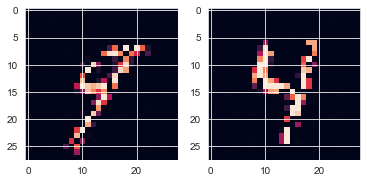

In [1472]:
# your code here
x_train_mnist_cs109 = pd.read_csv('data/x_train_mnist_cs109.csv')
#display(x_train_mnist_cs109.head())
x_train_mnist = x_train_mnist_cs109.values[:,:784]
print('x_train_mnist shape',x_train_mnist.shape)
y_train_mnist = x_train_mnist_cs109.values[:,784]
print('y_train_mnist shape',y_train_mnist.shape)

x_test_mnist_cs109 = pd.read_csv('data/x_test_mnist_cs109.csv')
#display(x_test_mnist_cs109.head())
x_test_mnist = x_test_mnist_cs109.values[:,:784]
print('x_test_mnist shape',x_test_mnist.shape)


sample_submission = pd.read_csv('data/sample_submission.csv')
#display(sample_submission.head())

nine = x_train_mnist[0]
nine = nine.reshape(28,28)
four = x_train_mnist[2]
four = four.reshape(28,28)

fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(nine)

ax = fig.add_subplot(122)
ax.imshow(four)

**3.2** **Overfit an ANN:** Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to a variable called `model_overfit`:

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100, 100, 100
2. Activation function: ReLU
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: no more than 2,000
7. Batch size: 128
8. Validation size: .3

This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the # of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting.

<span style='color:red'>**Important:**</span> You must also print out the final train & validation accuracy score of your overfit model. These are needed for evaluating Q3.3



In [1219]:
from tensorflow.keras import regularizers


In [1257]:
# your code here
model_overfit = tf.keras.models.Sequential(name = 'FCN')
model_overfit.add(tf.keras.layers.Dense(100, activation = 'relu',input_shape=(784,), name='h1'))
model_overfit.add(tf.keras.layers.Dense(100, activation = 'relu', name='h2'))
model_overfit.add(tf.keras.layers.Dense(100, activation = 'relu', name='h3'))
model_overfit.add(tf.keras.layers.Dense(1, activation='sigmoid', name='output'))
model_overfit.compile(loss='binary_crossentropy', validation_split=0.3, optimizer='adam', metrics=["accuracy"])
model_overfit.summary()
epoch = 50
history_overfit = model_overfit.fit(x_train_mnist,y_train_mnist,epochs=epoch, validation_split=0.2, batch_size=128)

Model: "FCN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 100)               78500     
_________________________________________________________________
h2 (Dense)                   (None, 100)               10100     
_________________________________________________________________
h3 (Dense)                   (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________
Train on 1280 samples, validate on 320 samples
Epoch 1/50
1280/1280 [==============================] - 1s 862us/sample - loss: 8.2451 - accuracy: 0.6219 - val_loss: 2.3577 - val_accuracy: 0.7937
Epoch 2/50
1280/1280 [==============================] - 0s 89u

Epoch 49/50
1280/1280 [==============================] - 0s 112us/sample - loss: 9.3602e-05 - accuracy: 1.0000 - val_loss: 1.1830 - val_accuracy: 0.8344
Epoch 50/50
1280/1280 [==============================] - 0s 94us/sample - loss: 9.1458e-05 - accuracy: 1.0000 - val_loss: 1.1827 - val_accuracy: 0.8344


train acc =  1.0 
val acc =  0.834375
train acc - val acc =  0.16562498


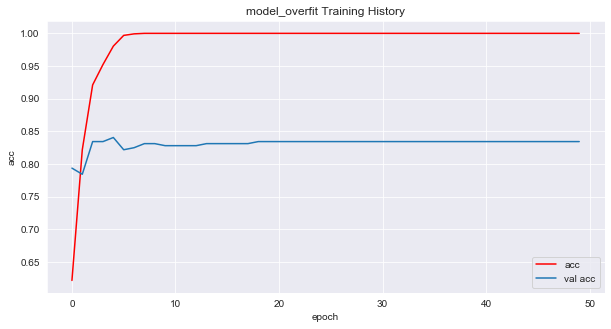

In [1448]:

plt.figure(figsize=(10,5))
plt.plot(history_overfit.history['accuracy'], c='r', label='acc')
plt.plot(history_overfit.history['val_accuracy'], label='val acc')

plt.ylabel('acc')
plt.xlabel('epoch')
plt.title('model_overfit Training History');
plt.legend()

print('train acc = ',history_overfit.history['accuracy'][epoch-1],'\nval acc = ',history_overfit.history['val_accuracy'][epoch-1])
print('train acc - val acc = ',history_overfit.history['accuracy'][epoch-1] - history_overfit.history['val_accuracy'][epoch-1])

print(S)

*your answer here*

As can be seen from the figure above, the accuracy of the training set is almost 1, while that of the test set is around 0.83, showing a big difference between the two performances
---

**3.3** Create an ANN that doesn't overfit and compete on Kaggle.

Keep the architecture above as is. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You can also do data augmentation.


- 3.3.1 Display model summary, training and validation accuracy and loss.
<span style='color:red'>**Important:**</span> You _must_ print out the final train accuracy score of your good model. This is needed for evaluating Q3.3
- 3.3.2 Print the difference between training and validation accuracy and loss.
- 3.3.3 Plot the training accuracy and validation accuracy as a function of epochs.
- 3.3.4 Save the model using `model.save(filename)` and **submit it along with your notebook**. Code on how to save your model is provided below.
- 3.3.5 **Submit your Kaggle name that you have used on the leaderboard. *We can't give you credit without this* . Fill the cell below that starts with ### (Group 4) ###.**




**RULES:**

- **Please do not manually label your submissions.** In other words the labels should be the outcome of your model.

- **No CNNs allowed for this competition.**

- **No external data are allowed, please only use the x_train_mnist_cs109.csv for training the models.**

- **Do not create multiple accounts on Kaggle.**


**Grading:** (all accuracies are in percentages)

S1: (Model overfit training accuracy - Model overfit validation accuracy)  => How much are you overfitting 3.2  ?

S2: (Good model training accuracy - Good model average on Kaggle)  => How much are you overfitting on kaggle 3.3

S3: (min (0, Good model training accuracy - Model overfit training accuracy )) => Your good model accuracy must be higher than model overfit.

score = S1 - S2 + S3

1. score > 1 : 4pt
2. score > 1.5-2.0 : 8pts
3. score > 2.0: 12pts
4. 3pt extra to the top 10 students



### import data

In [1670]:
# your code here
x_train_mnist_cs109 = pd.read_csv('data/x_train_mnist_cs109.csv')
#display(x_train_mnist_cs109.head())
x_train_mnist = x_train_mnist_cs109.values[:,:784]
print('x_train_mnist shape',x_train_mnist.shape)
y_train_mnist = x_train_mnist_cs109.values[:,784]
print('y_train_mnist shape',y_train_mnist.shape)

x_test_mnist_cs109 = pd.read_csv('data/x_test_mnist_cs109.csv')
#display(x_test_mnist_cs109.head())
x_test_mnist = x_test_mnist_cs109.values[:,:784]
print('x_test_mnist shape',x_test_mnist.shape)


sample_submission = pd.read_csv('data/sample_submission.csv')
#display(sample_submission.head())

x_train_mnist shape (1600, 784)
y_train_mnist shape (1600,)
x_test_mnist shape (3200, 784)


### 1. data augmentation

In [1671]:
def trans(old):
    new = np.zeros((1600,784))
    for i in range(old.shape[0]):
        for j in range(old.shape[1]):
            if old[i][j]>1:
                new[i][j]=100
    return new 
def trans2(old):
    new = np.zeros((1600,784))
    for i in range(old.shape[0]):
        for j in range(old.shape[1]):
            if old[i][j]>0:
                new[i][j]=100
    return new 

In [1672]:
new = trans(x_train_mnist)
#new2 = trans2(x_train_mnist)

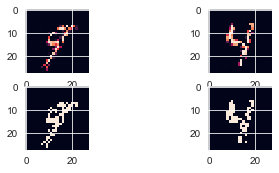

In [1673]:
nine = x_train_mnist[0]
nine = nine.reshape(28,28)
four = x_train_mnist[2]
four = four.reshape(28,28)

new_nine = new[0]
new_nine = new_nine.reshape(28,28)
new_four = new[2]
new_four = new_four.reshape(28,28)

new_nine2 = new2[0]
new_nine2 = new_nine2.reshape(28,28)
new_four2 = new2[2]
new_four2 = new_four2.reshape(28,28)

fig = plt.figure()
ax = fig.add_subplot(321)
ax.imshow(nine)

ax = fig.add_subplot(322)
ax.imshow(four)

ax = fig.add_subplot(323)
ax.imshow(new_nine)

ax = fig.add_subplot(324)
ax.imshow(new_four)

#ax = fig.add_subplot(325)
#ax.imshow(new_nine2)

#ax = fig.add_subplot(326)
#ax.imshow(new_four2)

In [1674]:
augmen_x_train = np.vstack((x_train_mnist, new))
augmen_y_train = np.hstack((y_train_mnist, y_train_mnist))
print('augmen_x_train shape',augmen_x_train.shape)
print('augmen_y_train shape',augmen_y_train.shape)

augmen_x_train shape (3200, 784)
augmen_y_train shape (3200,)


### 2.Regularization

####  3.3.1 Display model summary, training and validation accuracy and loss.
<span style='color:red'>**Important:**</span> You _must_ print out the final train accuracy score of your good model. This is needed for evaluating Q3.3

In [1675]:
# your code here
import os
saved_weight = os.path.join('dataweights.{epoch:02d}_{val_loss:.2f}.hdf5')

model_good = tf.keras.models.Sequential(name = 'good')
my_reg = regularizers.l2(0.01)
model_good.add(tf.keras.layers.Dense(100, activation = 'relu',input_shape=(784,), name='h1' ,kernel_regularizer=my_reg))
model_good.add(tf.keras.layers.Dense(100, activation = 'relu', name='h2' ,kernel_regularizer=my_reg))
model_good.add(tf.keras.layers.Dense(100, activation = 'relu', name='h3' ,kernel_regularizer=my_reg))
model_good.add(tf.keras.layers.Dense(1, activation='sigmoid', name='output' ,kernel_regularizer=my_reg))
model_good.compile(loss='binary_crossentropy', validation_split=0.3, optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=["accuracy"])
model_good.summary()
modelchk = tf.keras.callbacks.ModelCheckpoint(saved_weight, 
                                      monitor='val_accuracy', 
                                      verbose=1,
                                      save_best_only=True, 
                                      save_weights_only=False,
                                      mode='auto',
                                      period=1)
history_good = model_good.fit(augmen_x_train,augmen_y_train,epochs=300, callbacks=[modelchk], validation_split=0.2, batch_size=128)

Model: "good"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 100)               78500     
_________________________________________________________________
h2 (Dense)                   (None, 100)               10100     
_________________________________________________________________
h3 (Dense)                   (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________
Train on 2560 samples, validate on 640 samples
Epoch 1/300
2048/2560 [=======================>......] - ETA: 0s - loss: 6.0610 - accuracy: 0.6953
Epoch 00001: val_accuracy improved from -inf to 0.86875, saving model to dataweights.01_3.80.hdf5
2560/2560 [=

Epoch 25/300
2176/2560 [========================>.....] - ETA: 0s - loss: 1.1951 - accuracy: 1.0000
Epoch 00025: val_accuracy did not improve from 0.94375
2560/2560 [==============================] - 0s 86us/sample - loss: 1.1918 - accuracy: 1.0000 - val_loss: 1.3337 - val_accuracy: 0.9406
Epoch 26/300
2304/2560 [==========================>...] - ETA: 0s - loss: 1.1508 - accuracy: 1.0000
Epoch 00026: val_accuracy did not improve from 0.94375
2560/2560 [==============================] - 0s 74us/sample - loss: 1.1487 - accuracy: 1.0000 - val_loss: 1.2891 - val_accuracy: 0.9406
Epoch 27/300
2176/2560 [========================>.....] - ETA: 0s - loss: 1.1104 - accuracy: 1.0000
Epoch 00027: val_accuracy did not improve from 0.94375
2560/2560 [==============================] - 0s 88us/sample - loss: 1.1074 - accuracy: 1.0000 - val_loss: 1.2457 - val_accuracy: 0.9375
Epoch 28/300
2176/2560 [========================>.....] - ETA: 0s - loss: 1.0707 - accuracy: 1.0000
Epoch 00028: val_accuracy d

Epoch 52/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.4673 - accuracy: 1.0000
Epoch 00052: val_accuracy did not improve from 0.96250
2560/2560 [==============================] - 0s 87us/sample - loss: 0.4662 - accuracy: 1.0000 - val_loss: 0.5606 - val_accuracy: 0.9531
Epoch 53/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.4523 - accuracy: 1.0000
Epoch 00053: val_accuracy did not improve from 0.96250
2560/2560 [==============================] - 0s 90us/sample - loss: 0.4513 - accuracy: 1.0000 - val_loss: 0.5423 - val_accuracy: 0.9609
Epoch 54/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.4378 - accuracy: 1.0000
Epoch 00054: val_accuracy improved from 0.96250 to 0.96406, saving model to dataweights.54_0.52.hdf5
2560/2560 [==============================] - 0s 107us/sample - loss: 0.4368 - accuracy: 1.0000 - val_loss: 0.5229 - val_accuracy: 0.9641
Epoch 55/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.4237

Epoch 80/300
2304/2560 [==========================>...] - ETA: 0s - loss: 0.1968 - accuracy: 1.0000
Epoch 00080: val_accuracy did not improve from 0.97969
2560/2560 [==============================] - 0s 75us/sample - loss: 0.1968 - accuracy: 1.0000 - val_loss: 0.2787 - val_accuracy: 0.9656
Epoch 81/300
2432/2560 [===========================>..] - ETA: 0s - loss: 0.1952 - accuracy: 0.9996
Epoch 00081: val_accuracy did not improve from 0.97969
2560/2560 [==============================] - 0s 73us/sample - loss: 0.1949 - accuracy: 0.9996 - val_loss: 0.3154 - val_accuracy: 0.9438
Epoch 82/300
2304/2560 [==========================>...] - ETA: 0s - loss: 0.4451 - accuracy: 0.9310
Epoch 00082: val_accuracy did not improve from 0.97969
2560/2560 [==============================] - 0s 74us/sample - loss: 0.4324 - accuracy: 0.9344 - val_loss: 0.3662 - val_accuracy: 0.9531
Epoch 83/300
2304/2560 [==========================>...] - ETA: 0s - loss: 0.3088 - accuracy: 0.9740
Epoch 00083: val_accuracy d

2304/2560 [==========================>...] - ETA: 0s - loss: 0.1054 - accuracy: 1.0000
Epoch 00108: val_accuracy did not improve from 0.97969
2560/2560 [==============================] - 0s 79us/sample - loss: 0.1053 - accuracy: 1.0000 - val_loss: 0.1759 - val_accuracy: 0.9703
Epoch 109/300
2304/2560 [==========================>...] - ETA: 0s - loss: 0.1028 - accuracy: 1.0000
Epoch 00109: val_accuracy did not improve from 0.97969
2560/2560 [==============================] - 0s 77us/sample - loss: 0.1027 - accuracy: 1.0000 - val_loss: 0.1715 - val_accuracy: 0.9719
Epoch 110/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.1004 - accuracy: 1.0000
Epoch 00110: val_accuracy did not improve from 0.97969
2560/2560 [==============================] - 0s 79us/sample - loss: 0.1002 - accuracy: 1.0000 - val_loss: 0.1732 - val_accuracy: 0.9703
Epoch 111/300
2304/2560 [==========================>...] - ETA: 0s - loss: 0.0978 - accuracy: 1.0000
Epoch 00111: val_accuracy did not imp

2176/2560 [========================>.....] - ETA: 0s - loss: 0.0573 - accuracy: 1.0000
Epoch 00136: val_accuracy did not improve from 0.97969
2560/2560 [==============================] - 0s 78us/sample - loss: 0.0573 - accuracy: 1.0000 - val_loss: 0.1172 - val_accuracy: 0.9766
Epoch 137/300
2304/2560 [==========================>...] - ETA: 0s - loss: 0.0561 - accuracy: 1.0000
Epoch 00137: val_accuracy did not improve from 0.97969
2560/2560 [==============================] - 0s 90us/sample - loss: 0.0560 - accuracy: 1.0000 - val_loss: 0.1227 - val_accuracy: 0.9719
Epoch 138/300
2048/2560 [=======================>......] - ETA: 0s - loss: 0.0551 - accuracy: 1.0000
Epoch 00138: val_accuracy did not improve from 0.97969
2560/2560 [==============================] - 0s 101us/sample - loss: 0.0550 - accuracy: 1.0000 - val_loss: 0.1157 - val_accuracy: 0.9797
Epoch 139/300
2048/2560 [=======================>......] - ETA: 0s - loss: 0.0540 - accuracy: 1.0000
Epoch 00139: val_accuracy did not im

Epoch 164/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.0369 - accuracy: 1.0000
Epoch 00164: val_accuracy did not improve from 0.98125
2560/2560 [==============================] - 0s 100us/sample - loss: 0.0369 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9766
Epoch 165/300
2048/2560 [=======================>......] - ETA: 0s - loss: 0.0364 - accuracy: 1.0000
Epoch 00165: val_accuracy did not improve from 0.98125
2560/2560 [==============================] - 0s 93us/sample - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.0940 - val_accuracy: 0.9750
Epoch 166/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.0359 - accuracy: 1.0000
Epoch 00166: val_accuracy did not improve from 0.98125
2560/2560 [==============================] - 0s 81us/sample - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.1025 - val_accuracy: 0.9688
Epoch 167/300
2048/2560 [=======================>......] - ETA: 0s - loss: 0.0356 - accuracy: 1.0000
Epoch 00167: val_accur

2048/2560 [=======================>......] - ETA: 0s - loss: 0.0341 - accuracy: 1.0000
Epoch 00192: val_accuracy did not improve from 0.98125
2560/2560 [==============================] - 0s 93us/sample - loss: 0.0341 - accuracy: 1.0000 - val_loss: 0.1018 - val_accuracy: 0.9719
Epoch 193/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.0335 - accuracy: 1.0000
Epoch 00193: val_accuracy did not improve from 0.98125
2560/2560 [==============================] - 0s 94us/sample - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.1001 - val_accuracy: 0.9734
Epoch 194/300
1920/2560 [=====================>........] - ETA: 0s - loss: 0.0329 - accuracy: 1.0000
Epoch 00194: val_accuracy did not improve from 0.98125
2560/2560 [==============================] - 0s 111us/sample - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.9734
Epoch 195/300
2048/2560 [=======================>......] - ETA: 0s - loss: 0.0323 - accuracy: 1.0000
Epoch 00195: val_accuracy did not im

2048/2560 [=======================>......] - ETA: 0s - loss: 0.0254 - accuracy: 1.0000
Epoch 00220: val_accuracy did not improve from 0.98125
2560/2560 [==============================] - 0s 96us/sample - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9797
Epoch 221/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.0253 - accuracy: 1.0000
Epoch 00221: val_accuracy did not improve from 0.98125
2560/2560 [==============================] - 0s 77us/sample - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0882 - val_accuracy: 0.9703
Epoch 222/300
2304/2560 [==========================>...] - ETA: 0s - loss: 0.0251 - accuracy: 1.0000
Epoch 00222: val_accuracy did not improve from 0.98125
2560/2560 [==============================] - 0s 78us/sample - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 0.9734
Epoch 223/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.0251 - accuracy: 1.0000
Epoch 00223: val_accuracy did not imp

2176/2560 [========================>.....] - ETA: 0s - loss: 0.0244 - accuracy: 1.0000
Epoch 00248: val_accuracy improved from 0.98125 to 0.98281, saving model to dataweights.248_0.08.hdf5
2560/2560 [==============================] - 0s 94us/sample - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9828
Epoch 249/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.0242 - accuracy: 1.0000
Epoch 00249: val_accuracy did not improve from 0.98281
2560/2560 [==============================] - 0s 78us/sample - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 0.9734
Epoch 250/300
2176/2560 [========================>.....] - ETA: 0s - loss: 0.0244 - accuracy: 1.0000
Epoch 00250: val_accuracy improved from 0.98281 to 0.98594, saving model to dataweights.250_0.07.hdf5
2560/2560 [==============================] - 0s 95us/sample - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.0736 - val_accuracy: 0.9859
Epoch 251/300
2048/2560 [===================

Epoch 276/300
2048/2560 [=======================>......] - ETA: 0s - loss: 0.0310 - accuracy: 1.0000
Epoch 00276: val_accuracy did not improve from 0.98594
2560/2560 [==============================] - 0s 96us/sample - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.0853 - val_accuracy: 0.9688
Epoch 277/300
2048/2560 [=======================>......] - ETA: 0s - loss: 0.0303 - accuracy: 1.0000
Epoch 00277: val_accuracy did not improve from 0.98594
2560/2560 [==============================] - 0s 105us/sample - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9688
Epoch 278/300
2048/2560 [=======================>......] - ETA: 0s - loss: 0.0297 - accuracy: 1.0000
Epoch 00278: val_accuracy did not improve from 0.98594
2560/2560 [==============================] - 0s 103us/sample - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9703
Epoch 279/300
1920/2560 [=====================>........] - ETA: 0s - loss: 0.0291 - accuracy: 1.0000
Epoch 00279: val_accu

In [1676]:
last = len(history_good.history['accuracy'])
print('train accuracy = ', history_good.history['accuracy'][last-1])

train accuracy =  1.0


#### 3.3.2 Print the difference between training and validation accuracy and loss.

In [1677]:
print("the best model's val_accuracy" ,(max(history_good.history['val_accuracy'])))
index  = history_good.history['val_accuracy'].index((max(history_good.history['val_accuracy'])))
print("the best model's index",index)
print('train accuracy = ', history_good.history['accuracy'][index])

#print('val accuracy = ', max(history_good.history['val_accuracy']))
print('train loss = ', history_good.history['loss'][index])
print('val loss = ', history_good.history['val_loss'][index])
print('the difference between training and validation accuracy = ', history_good.history['accuracy'][index] - history_good.history['val_accuracy'][index])
print('the difference between training and validation loss = ', history_good.history['loss'][index] - history_good.history['val_loss'][index])




the best model's val_accuracy 0.9859375
the best model's index 249
train accuracy =  1.0
train loss =  0.024313105922192334
val loss =  0.07357616424560547
the difference between training and validation accuracy =  0.014062524
the difference between training and validation loss =  -0.04926305832341313


#### 3.3.3 Plot the training accuracy and validation accuracy as a function of epochs.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
val_accuracy 0.971875


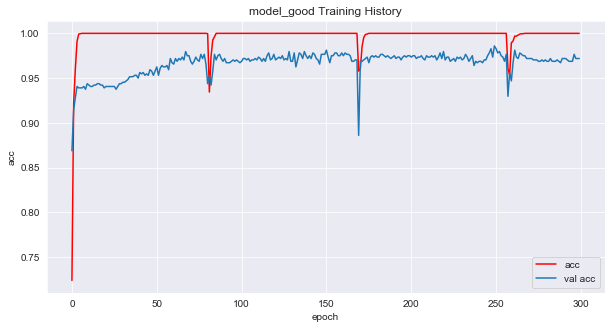

In [1678]:
plt.figure(figsize=(10,5))
print(history_good.history.keys())
plt.plot(history_good.history['accuracy'], c='r', label='acc')
plt.plot(history_good.history['val_accuracy'], label='val acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.title('model_good Training History');
plt.legend()
last = len(history_good.history['val_accuracy'])
print('val_accuracy', history_good.history['val_accuracy'][last-1])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
val loss 0.024313105922192334


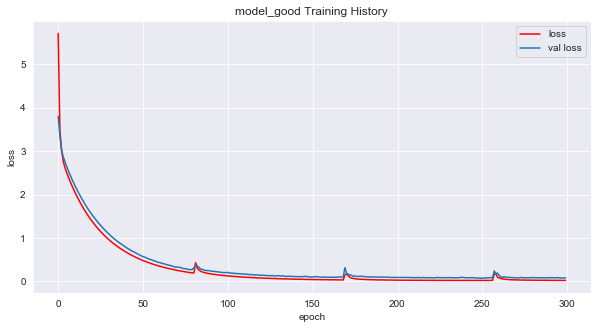

In [1679]:
plt.figure(figsize=(10,5))
print(history_good.history.keys())
plt.plot(history_good.history['loss'], c='r', label='loss')
plt.plot(history_good.history['val_loss'], label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('model_good Training History');
plt.legend()
last = len(history_good.history['loss'])
print('val loss', history_good.history['loss'][index])

### (Group 4) ###

**Your Kaggle Leaderboard name(No credit without the name!) = Group 4

In [1680]:
# your code here
display(sample_submission.head())

id  category
0   0         0
1   1         0
2   2         0
3   3         0
4   4         0

In [1683]:
# your code here
#predict_test = model_good.predict(x_test_mnist)
model = tf.keras.models.load_model(os.path.join('dataweights.250_0.07.hdf5'))
predict_test = model.predict(x_test_mnist)
ID = np.zeros((3200,1))
for i in range(ID.size):
    ID[i] =int(i)
for i in range(predict_test.size):
    if predict_test[i]>0.5:
        predict_test[i]=int(1)
    else:
        predict_test[i]=int(0)
result = augmen_y_train = np.hstack((ID, predict_test))
result = result.astype('int')
print(type(result))
columns = ["id", "category"]
dt = pd.DataFrame(result, columns=columns)
#dt.to_excel("save_usename_team.xlsx", index=0)
dt.to_csv("submission.csv", index=0)

<class 'numpy.ndarray'>


In [1684]:
# your code here
submission_csv = pd.read_csv('submission.csv')
display(submission_csv.head())

id  category
0   0         0
1   1         0
2   2         1
3   3         1
4   4         1

####  3.3.4 Save the model using `model.save(filename)` and **submit it along with your notebook**. Code on how to save your model is provided below.

In [1667]:
# serialize model to JSON
model_json = model_good.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_good.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


---